### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pmdarima import auto_arima
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error


### EDA

In [3]:
data = pd.read_csv('MER_T12_06.csv')
data.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [4]:
data.tail()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
5089,TXEIEUS,201603,115.997,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5090,TXEIEUS,201604,113.815,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5091,TXEIEUS,201605,129.44,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5092,TXEIEUS,201606,172.074,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5093,TXEIEUS,201607,201.958,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


Comment: Don't have null value and the column `Value` have data type is `object`. So we need to convert it to `numeric` to EDA the data.

In [6]:
data.describe()

,YYYYMM,Column_Order
count,5094.000000,5094.000000
mean,199434.171378,5.000000
std,1257.074138,2.582242
min,197301.000000,1.000000
25%,198312.000000,3.000000
50%,199410.500000,5.000000
75%,200509.000000,7.000000
max,201607.000000,9.000000


In [7]:
data.describe(include='O')

,MSN,Value,Description,Unit
count,5094,5094,5094,5094
unique,9,3602,9,1
top,CLEIEUS,Not Available,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
freq,566,416,566,5094


In [8]:
# convert
data.Value = pd.to_numeric(data.Value, errors='coerce')
data.YYYYMM = pd.to_datetime(data.YYYYMM, format='%Y%m', errors='coerce')
data = data.dropna()

**Question 1:**
- Among the energy industries, which fuel emits the most CO2?
- Review CO2 emissions over the years.

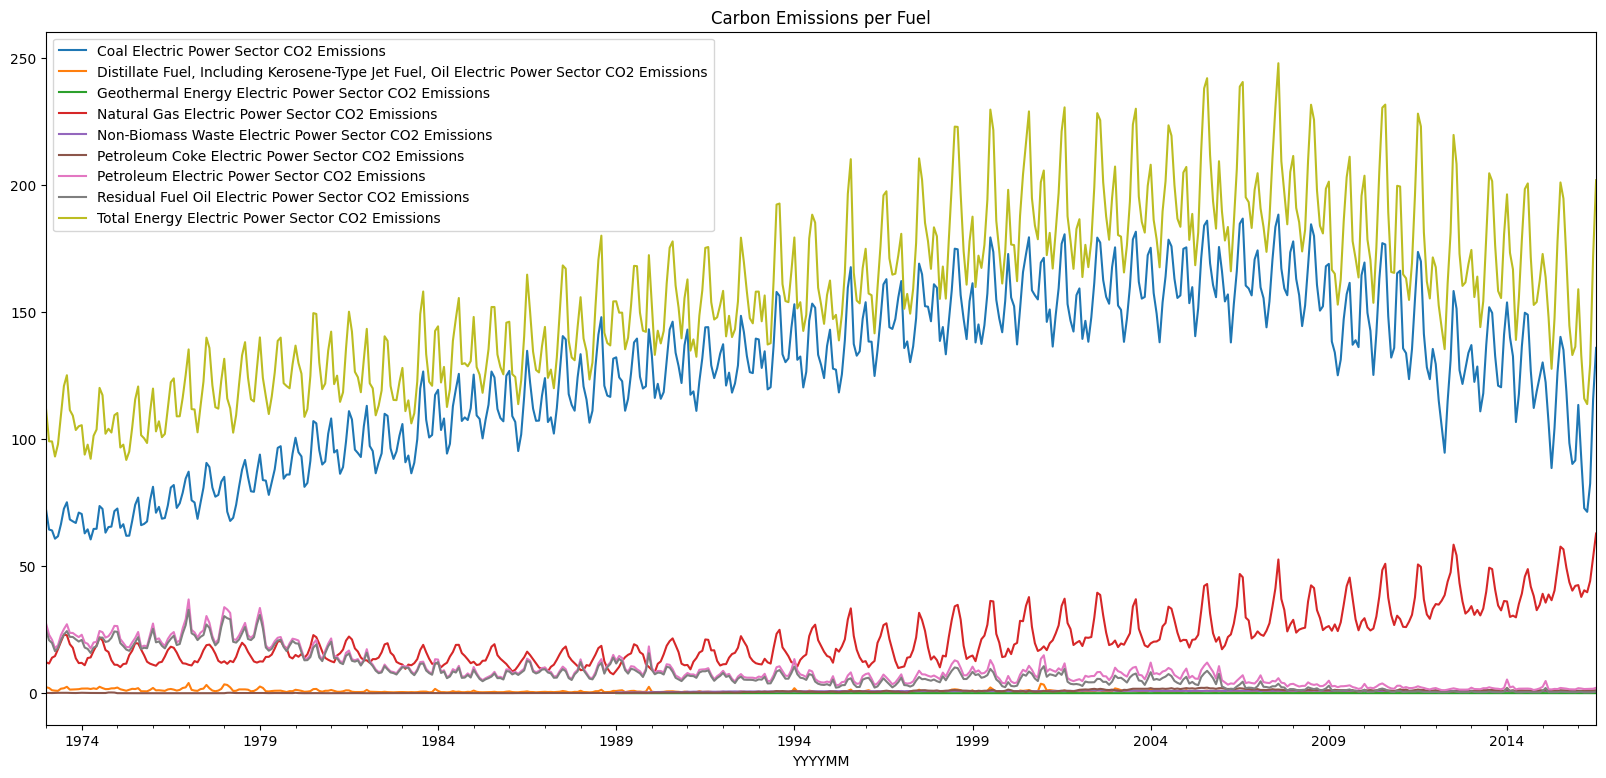

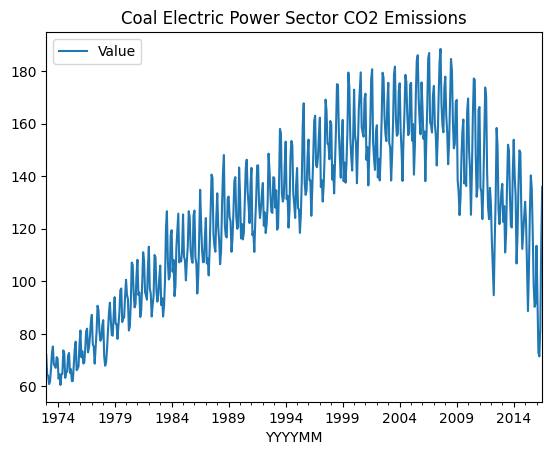

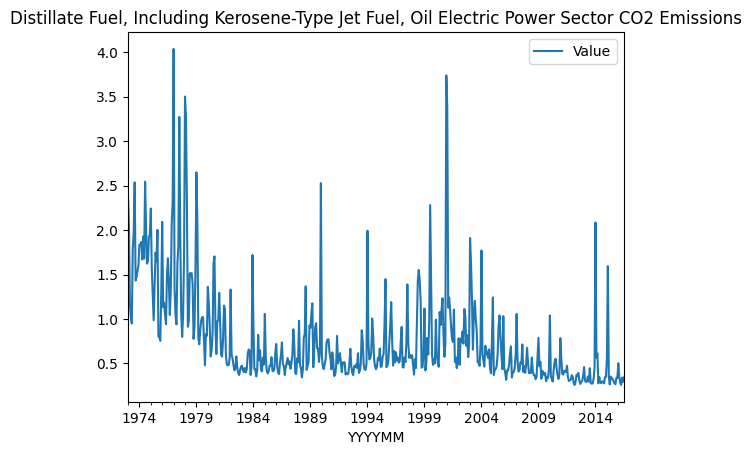

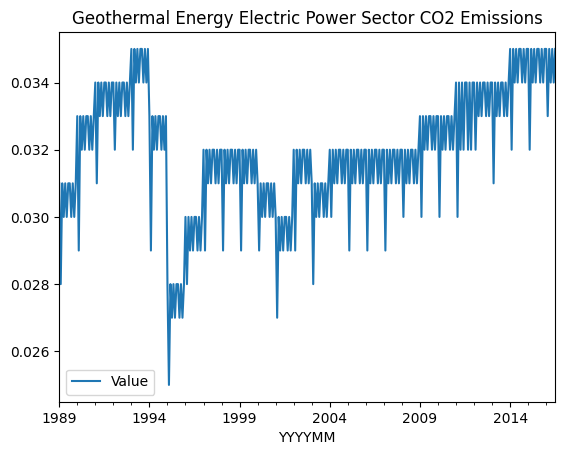

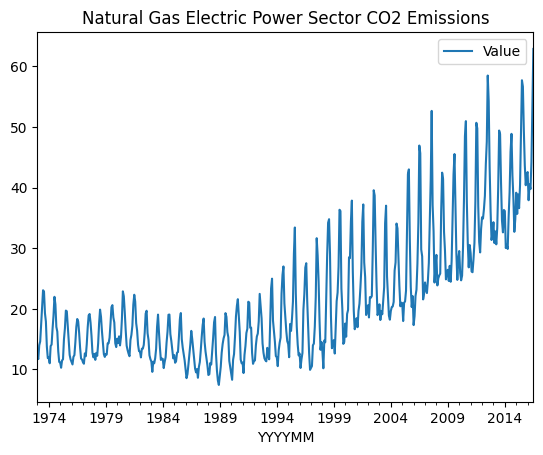

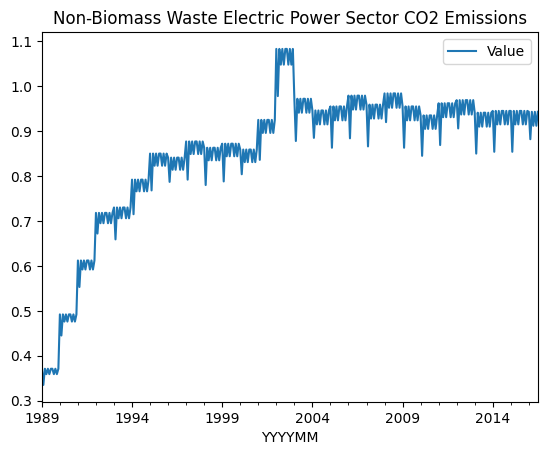

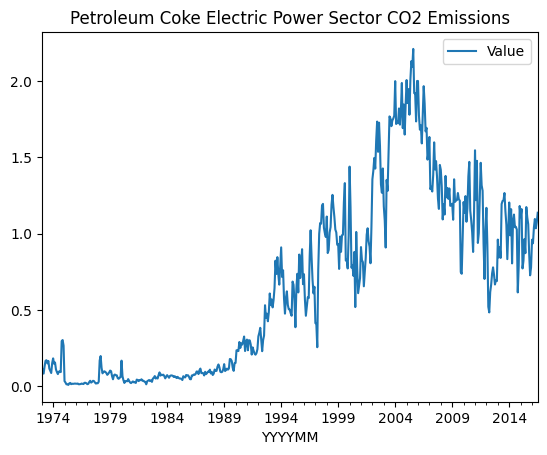

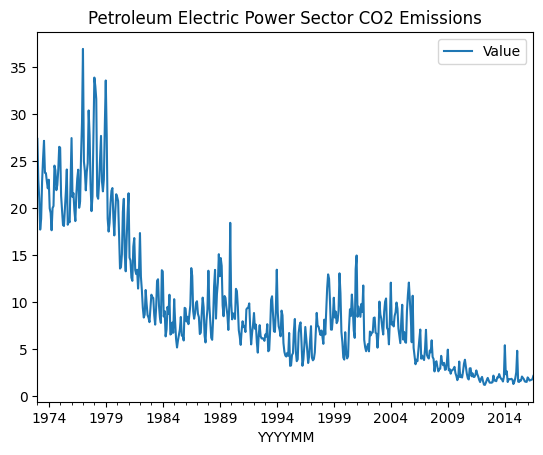

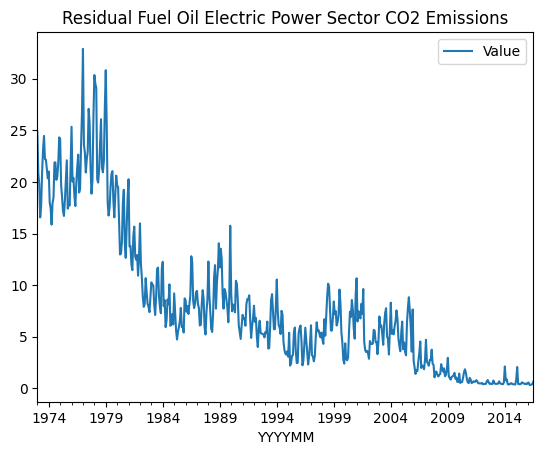

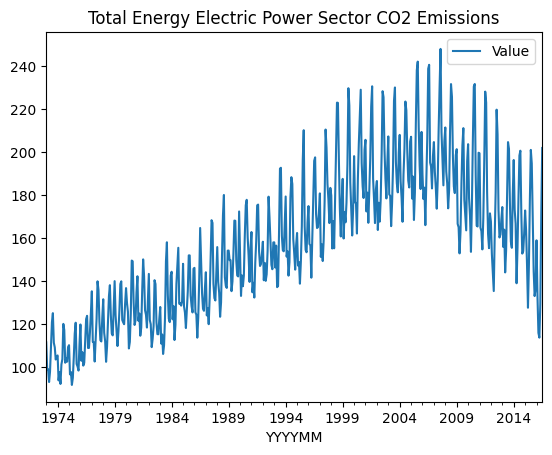

In [9]:
fuels = data.groupby('Description')
fig, ax = plt.subplots(figsize=(20,9))
for desc, group in fuels:
    group.plot(x='YYYYMM', y='Value', label=desc, ax=ax, title='Carbon Emissions per Fuel')
    group.plot(x='YYYYMM', y='Value', title=desc)

In [10]:
#Total emissions per fuel
values = data.groupby('Description')['Value'].sum()
values

Description
Coal Electric Power Sector CO2 Emissions                                                      65782.393
Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions      404.887
Geothermal Energy Electric Power Sector CO2 Emissions                                            10.563
Natural Gas Electric Power Sector CO2 Emissions                                               11295.359
Non-Biomass Waste Electric Power Sector CO2 Emissions                                           281.367
Petroleum Coke Electric Power Sector CO2 Emissions                                              338.785
Petroleum Electric Power Sector CO2 Emissions                                                  4982.993
Residual Fuel Oil Electric Power Sector CO2 Emissions                                          4239.312
Total Energy Electric Power Sector CO2 Emissions                                              82352.676
Name: Value, dtype: float64

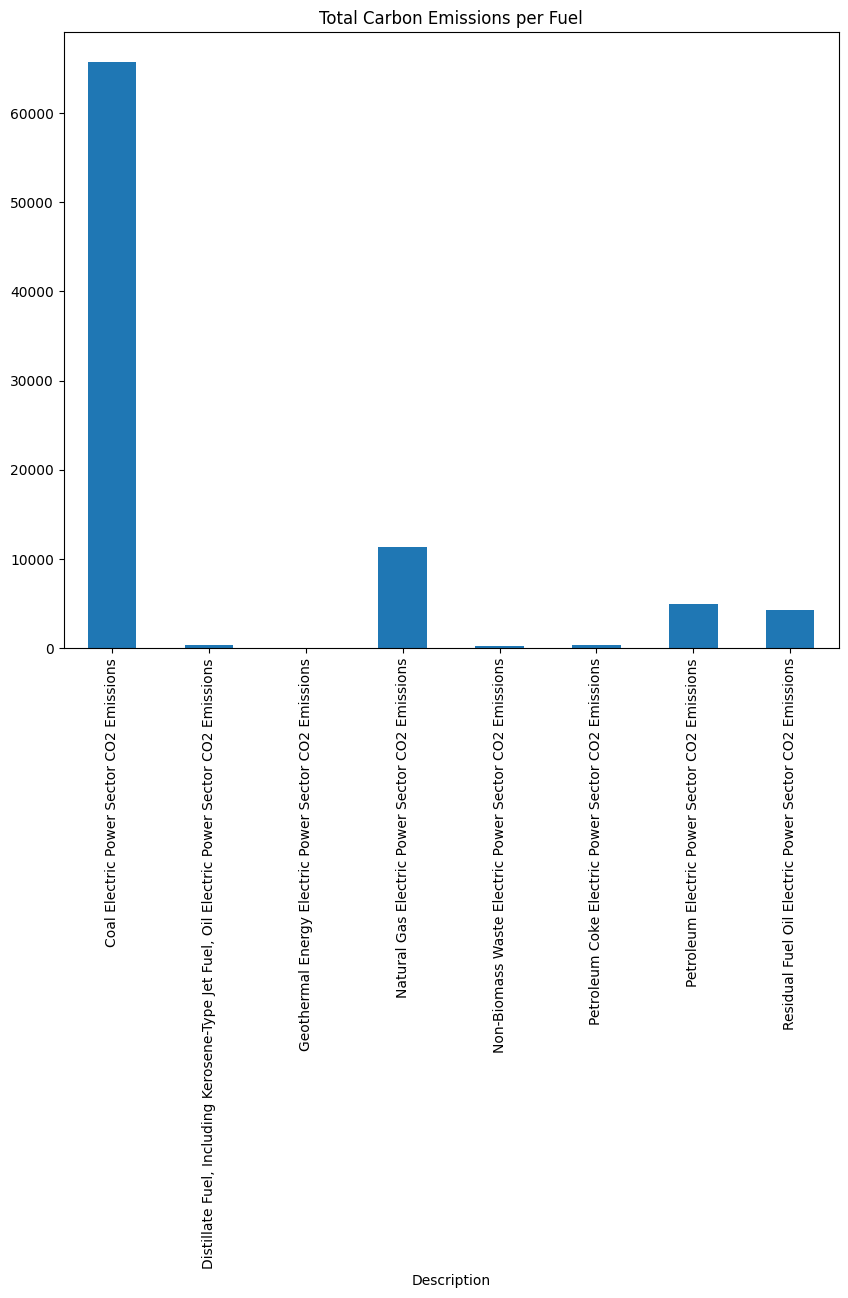

In [11]:
plt.figure(figsize=(10,8))
values[:-1].plot.bar(title='Total Carbon Emissions per Fuel')
plt.xticks(rotation='vertical')
plt.show()

**Answer for question 1:**
Based on the charts above, we can see that `coal` and `natural gas` are the fuels that emit the most CO2. This can be attributed to several factors.

1. Carbon Content: Coal and natural gas have high carbon content compared to other fuels. When these fuels are burned for energy production, carbon dioxide (CO2) is released as a byproduct of combustion. Coal has the highest carbon content among fossil fuels, followed by natural gas. This high carbon content directly contributes to their significant CO2 emissions.

2. Energy Production: Coal and natural gas are widely used for electricity generation and industrial processes. These sectors are major contributors to CO2 emissions globally. Coal-fired power plants, in particular, are known for their high emissions due to the large-scale combustion of coal to produce electricity.

3. Availability and Cost: Coal and natural gas have been historically abundant and relatively inexpensive energy sources, leading to their widespread use in many countries. The availability and cost-effectiveness of these fuels have contributed to their continued use despite the environmental concerns associated with their CO2 emissions.

4. Infrastructure and Technology: The existing infrastructure and technology for coal and natural gas extraction, transportation, and utilization are well-established in many regions. This makes it easier and more cost-effective to continue using these fuels rather than transitioning to alternative energy sources with lower CO2 emissions.

However, it's important to note that efforts are being made to reduce CO2 emissions from coal and natural gas. Technologies such as carbon capture and storage (CCS) are being developed to capture and store CO2 emissions from power plants and industrial facilities. Additionally, there is a growing shift towards renewable energy sources such as solar and wind power, which have significantly lower CO2 emissions compared to fossil fuels.

In conclusion, the high CO2 emissions associated with coal and natural gas can be attributed to their carbon content, predominant use in energy production and industry, availability and cost-effectiveness, as well as the existing infrastructure and technology. Transitioning to cleaner energy sources and implementing emission reduction technologies are crucial steps in mitigating the impact of these emissions on climate change.

The CO2 emissions of different types of fuels can be described as follows:

- Coal: The CO2 emissions from coal showed an increasing trend from 1974 to 2014. The emissions reached their highest point around 2004-2009 and have been gradually declining since then.

- Natural gas: The CO2 emissions from natural gas also showed a continuous increase from 1974 to 2014. Furthermore, there is still an ongoing upward trend in natural gas emissions.

- Petroleum coke: The CO2 emissions from petroleum coke showed a gradual increase from 1974 to 2014. However, the rate of increase was relatively slow compared to coal and natural gas. Petroleum coke is a byproduct of the oil refining process and is often used as a fuel in industrial processes.

- Non-biomass waste: The CO2 emissions from non-biomass waste also exhibited a slow but steady increase from 1974 to 2014. Non-biomass waste refers to waste materials that are not derived from living organisms, such as plastics and certain industrial byproducts. While the emissions from non-biomass waste are relatively low compared to other fuel types, their increasing trend indicates the need for effective waste management and recycling practices.

- Other fuels (non-biomass waste, petroleum, etc.): In contrast to coal and natural gas, the CO2 emissions from other fuels exhibited a decreasing pattern from 1974 to 2014. This implies that the emissions from these fuel types have been consistently declining over the years.

From the provided information, it can be concluded that coal and natural gas have been the primary contributors to CO2 emissions, with coal emissions showing a recent declining trend while natural gas emissions continue to rise. On the other hand, the emissions from other fuel sources have been decreasing steadily over the examined period. These trends highlight the importance of transitioning to cleaner and more sustainable energy sources to mitigate the impact of greenhouse gas emissions on climate change.

### Convert dataframe to timeseries

In [12]:
ts = data.set_index('YYYYMM')
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


### Decomposition

In [13]:
# decomposition
total_month = ts.drop('MSN', axis=1).groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level = 0)

In [14]:
total_month

Description,Coal Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Geothermal Energy Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,Non-Biomass Waste Electric Power Sector CO2 Emissions,Petroleum Coke Electric Power Sector CO2 Emissions,Petroleum Electric Power Sector CO2 Emissions,Residual Fuel Oil Electric Power Sector CO2 Emissions,Total Energy Electric Power Sector CO2 Emissions
YYYYMM,,,,,,,,,
1973-01-31,72.076,2.375,NaN,12.175,NaN,0.128,27.369,24.867,111.621
1973-02-28,64.442,2.061,NaN,11.708,NaN,0.106,23.034,20.867,99.185
1973-03-31,64.084,1.171,NaN,13.994,NaN,0.083,21.034,19.780,99.112
1973-04-30,60.842,1.022,NaN,14.627,NaN,0.130,17.714,16.562,93.183
1973-05-31,61.798,0.949,NaN,17.344,NaN,0.167,18.870,17.754,98.012
...,...,...,...,...,...,...,...,...,...
2016-03-31,72.840,0.279,0.035,40.525,0.943,1.041,1.654,0.334,115.997
2016-04-30,71.410,0.259,0.034,39.763,0.912,1.096,1.695,0.340,113.815
2016-05-31,82.510,0.340,0.035,44.210,0.943,1.035,1.743,0.368,129.440


**Question 2:**
Analyze the increase of "natural gas" electric power in co2 emissions and its impact on the environment.

In [15]:
natural_gas = total_month['Natural Gas Electric Power Sector CO2 Emissions']
natural_gas

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
               ...  
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, Length: 523, dtype: float64

In [16]:
result=seasonal_decompose(natural_gas, model='multiplicable', period=12)

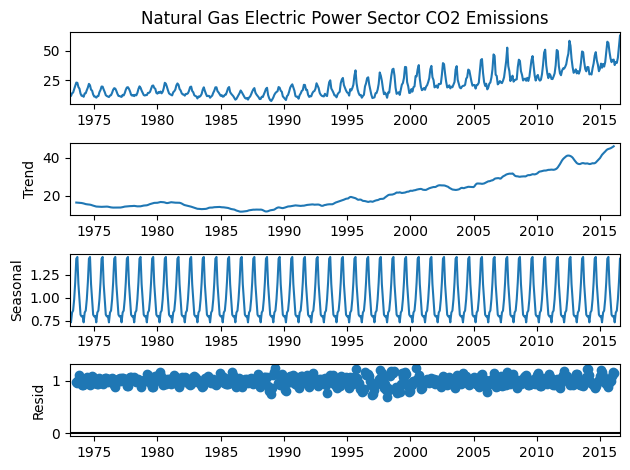

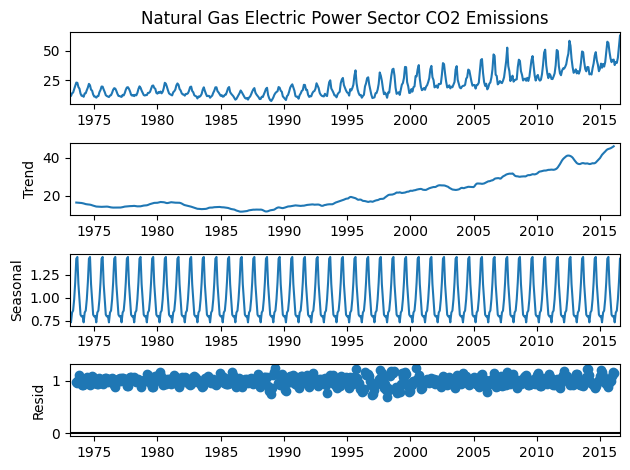

In [17]:
result.plot()

**Answer for question 2:**

In the visualization section:
- Plot 1 represents the original data, showing the CO2 emissions from the natural gas electric power sector over time.

- Plot 2, labeled "trend," illustrates the long-term trend of the data. It shows the overall direction of the data, whether it is increasing or decreasing. In this case, if the trend plot for natural gas is upward, it means that the CO2 emissions from the natural gas electric power sector have been increasing over time.

- Plot 3, labeled "seasonal," displays the seasonal or cyclical component of the data. It shows the variation in the data that occurs in a regular pattern. In this case, the seasonal plot might reveal seasonal fluctuations or other factors that influence the CO2 emissions from the natural gas electric power sector.

- Plot 4, labeled "residuals," represents the residual component of the data after removing the trend and seasonal components. The residuals capture the random fluctuations in the data.

The increasing trend in natural gas CO2 emissions can be explained by several factors:

- Widely used: Natural gas is a commonly used energy source in the electric power sector and various industrial processes. The increased use of natural gas for electricity generation and industrial operations has resulted in a significant amount of CO2 emissions.

- Cost-effectiveness: Natural gas has become a low-cost and widely available energy source compared to many other energy sources. This has led to an increased use of natural gas and, consequently, higher CO2 emissions.

- Nuclear power: In some countries, a reduction in nuclear energy usage has made natural gas a substitute energy source for electricity generation. The increased reliance on natural gas in the electric power sector can contribute to higher CO2 emissions.

The CO2 emissions from natural gas and other fossil fuel sources have negative impacts on the environment and contribute to climate change. CO2 is a potent greenhouse gas that accumulates in the atmosphere, causing a warming effect and contributing to global warming. The CO2 emissions from the natural gas electric power sector contribute to the increasing concentration of greenhouse gases in the atmosphere, leading to issues such as global temperature rise, extreme weather events, sea-level rise, and impacts on ecosystems and human health.

Therefore, reducing CO2 emissions from the natural gas electric power sector is crucial to mitigate the negative environmental impacts. This can be achieved by increasing the use of renewable and cleaner energy sources such as solar, wind, and hydroelectric power. Additionally, improving energy efficiency, promoting advanced technologies, and implementing energy-saving measures are effective ways to reduce CO2 emissions from the natural gas electric power sector and protect the environment.

### Build Model

In [18]:
# split train/test
train = natural_gas.loc['1973-01-01':'2014-02-01']
test = natural_gas.loc['2014-02-01':]

In [19]:
train

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
               ...  
2013-09-30    40.751
2013-10-31    34.547
2013-11-30    32.614
2013-12-31    36.308
2014-01-31    36.133
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, Length: 493, dtype: float64

In [20]:
test

YYYYMM
2014-02-28    30.036
2014-03-31    30.554
2014-04-30    29.885
2014-05-31    35.211
2014-06-30    39.228
2014-07-31    45.901
2014-08-31    48.871
2014-09-30    41.961
2014-10-31    38.286
2014-11-30    32.703
2014-12-31    34.800
2015-01-31    39.155
2015-02-28    35.668
2015-03-31    38.872
2015-04-30    36.610
2015-05-31    40.440
2015-06-30    48.920
2015-07-31    57.712
2015-08-31    56.662
2015-09-30    49.384
2015-10-31    43.680
2015-11-30    40.394
2015-12-31    42.270
2016-01-31    42.566
2016-02-29    37.918
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [21]:
# setup parameters
stepwise_model = auto_arima(natural_gas, start_p=2, start_q= 2,
                max_p=5, max_q=5, m=12,
                start_P=1, seasonal=True,
                d=1, D=1, trace=True,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=True
                            )

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(1,1,1)[12]             : AIC=2058.286, Time=2.53 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2332.657, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2181.357, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2090.016, Time=0.58 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=2055.808, Time=3.80 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=inf, Time=1.86 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=2057.773, Time=10.30 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=inf, Time=5.20 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=2059.671, Time=12.91 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=2053.898, Time=2.39 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=2262.019, Time=0.34 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=2055.851, Time=2.70 sec
 ARIMA(1,1,2)(0,1,2)[12]             : AIC=2055.844, Time=6.56 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=2136.428, Time=5.20 sec
 ARIMA(1,1,2)(1,1,2)[12]             : AIC=2057.758, Time=9.88 sec
 AR

In [22]:
print(stepwise_model.aic())

2052.378437606896


In [23]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

### Predict

In [24]:
# make predict
future_forecast = stepwise_model.predict(n_periods=len(test))

In [25]:
future_forecast

2014-02-28    33.537538
2014-03-31    34.596085
2014-04-30    34.691745
2014-05-31    38.079403
2014-06-30    44.334184
2014-07-31    54.270238
2014-08-31    54.014252
2014-09-30    43.496407
2014-10-31    37.324537
2014-11-30    33.761339
2014-12-31    36.460842
2015-01-31    37.122772
2015-02-28    34.686224
2015-03-31    35.846952
2015-04-30    36.008315
2015-05-31    39.438220
2015-06-30    45.720166
2015-07-31    55.673688
2015-08-31    55.428933
2015-09-30    44.918309
2015-10-31    38.751083
2015-11-30    35.190870
2015-12-31    37.892293
2016-01-31    38.555458
2016-02-29    36.119704
2016-03-31    37.280943
2016-04-30    37.442634
2016-05-31    40.872750
2016-06-30    47.154831
2016-07-31    57.108440
Freq: M, dtype: float64

In [26]:
test

YYYYMM
2014-02-28    30.036
2014-03-31    30.554
2014-04-30    29.885
2014-05-31    35.211
2014-06-30    39.228
2014-07-31    45.901
2014-08-31    48.871
2014-09-30    41.961
2014-10-31    38.286
2014-11-30    32.703
2014-12-31    34.800
2015-01-31    39.155
2015-02-28    35.668
2015-03-31    38.872
2015-04-30    36.610
2015-05-31    40.440
2015-06-30    48.920
2015-07-31    57.712
2015-08-31    56.662
2015-09-30    49.384
2015-10-31    43.680
2015-11-30    40.394
2015-12-31    42.270
2016-01-31    42.566
2016-02-29    37.918
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [27]:
# evaluate
mean_absolute_error(test, future_forecast)

3.3012635614956953

Comment: a lower MAE indicates better performance, as it means that, on average, the model's predictions are closer to the actual values.A MAE of 3.3012635614956953 suggests that, on average, the model's predictions have an absolute error of approximately 3.3 units.

In [28]:
future_forecast = pd.DataFrame(future_forecast,
                                index = test.index,
                                columns=['Prediction']
                                )
df_merge = pd.DataFrame(test).join(future_forecast)
df_merge.head(10)

,Natural Gas Electric Power Sector CO2 Emissions,Prediction
YYYYMM,,
2014-02-28,30.036,33.537538
2014-03-31,30.554,34.596085
2014-04-30,29.885,34.691745
2014-05-31,35.211,38.079403
2014-06-30,39.228,44.334184
2014-07-31,45.901,54.270238
2014-08-31,48.871,54.014252
2014-09-30,41.961,43.496407
2014-10-31,38.286,37.324537


Comment: model works relatively well

### Visualize and predict

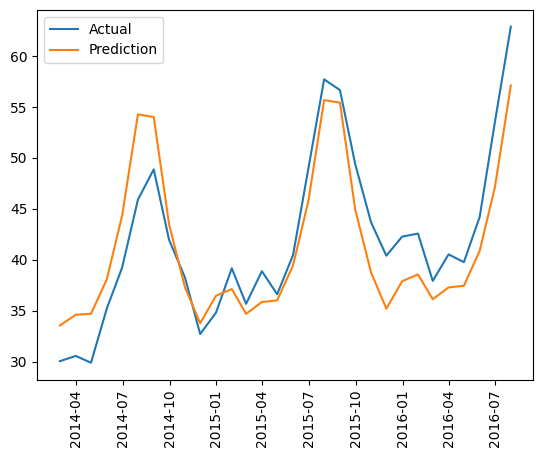

In [29]:
plt.plot(test, label='Actual')
plt.plot(future_forecast, label='Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

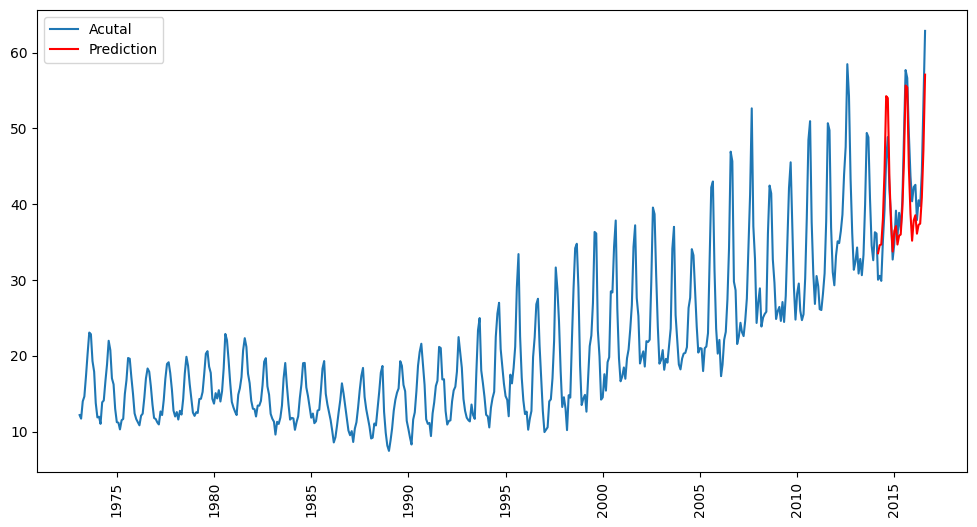

In [30]:
plt.figure(figsize=(12,6))
plt.plot(natural_gas, label='Acutal')
plt.plot(future_forecast, label='Prediction', color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

**Question 3:**
Predict the growth of 'natural gas' factor in the energy industry affecting CO2 emissions into the environment in the next 3 years and explain the results?

In [31]:
future_forecast_3 = stepwise_model.predict(n_periods=len(test)+3*12)
future_forecast_3

2014-02-28    33.537538
2014-03-31    34.596085
2014-04-30    34.691745
2014-05-31    38.079403
2014-06-30    44.334184
                ...    
2019-03-31    41.585666
2019-04-30    41.747359
2019-05-31    45.177476
2019-06-30    51.459559
2019-07-31    61.413168
Freq: M, Length: 66, dtype: float64

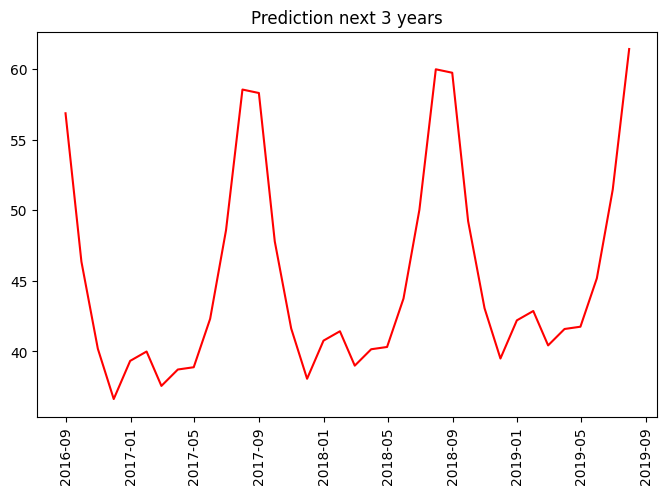

In [32]:
plt.figure(figsize=(8,5))
plt.plot(future_forecast_3[len(test):], color='red')
plt.xticks(rotation='vertical')
plt.title("Prediction next 3 years")
plt.show()

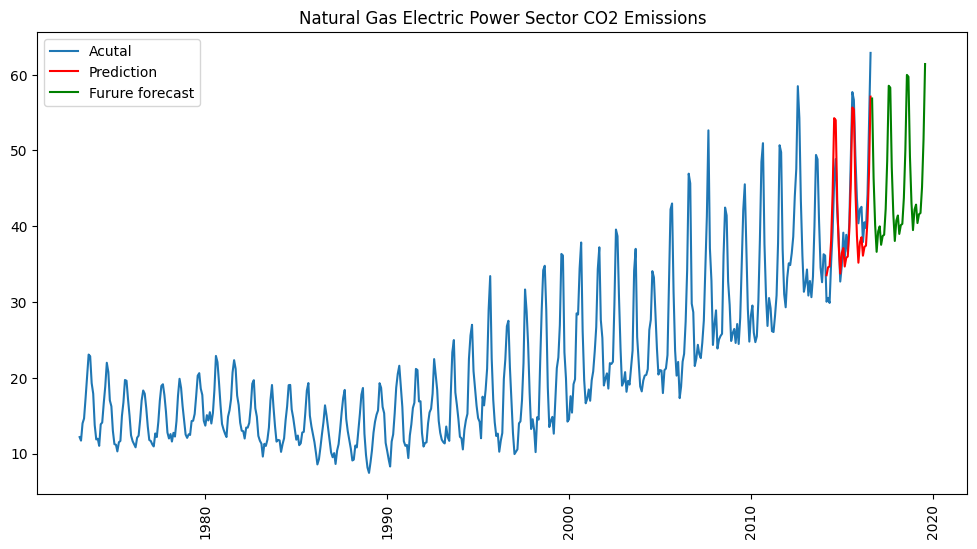

In [33]:
plt.figure(figsize=(12,6))
plt.plot(natural_gas, label='Acutal')
plt.plot(future_forecast, label='Prediction', color='red')
plt.plot(future_forecast_3[len(test):], color='green', label='Furure forecast')
plt.xticks(rotation='vertical')
plt.title("Natural Gas Electric Power Sector CO2 Emissions")
plt.legend()
plt.show()

**Answer for question 3:**
- As you can see the results are visualized using the ARIMA model I used. The use of natural gas in the power industry will continue to increase and have an impact on the environment in the next 3 years from 2016.

- Increasing Demand: Natural gas has been experiencing growing demand in the energy industry due to several factors. It is considered a cleaner-burning fossil fuel compared to coal and oil, as it emits fewer CO2 emissions per unit of energy produced. The demand for natural gas is likely to continue to rise as countries transition towards cleaner energy sources and strive to reduce their carbon footprints.

- Shifting Energy Mix: Many countries are shifting their energy mix towards natural gas as a replacement for coal in electricity generation. Natural gas power plants produce lower CO2 emissions compared to coal-fired power plants, making it an attractive option for reducing carbon emissions. This shift is driven by environmental regulations, economic considerations, and the availability of natural gas resources.

- Technological Advancements: Advancements in drilling technologies, such as hydraulic fracturing (fracking), have unlocked vast reserves of natural gas previously deemed inaccessible. This has led to increased production and availability of natural gas, making it a more viable and cost-effective energy source.